In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import scipy.stats as stats
import matplotlib.style as style

from numpy import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [148]:
# importing dataset
df = pd.read_csv('dev.csv')
df = df.rename(columns={"Unnamed: 0":"ID"})
df.head()

ID  latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0  26000   -35.441    150.028       361.8   1.4    1.2  2019-12-04      1230   
1  26001   -36.120    149.515       337.7   1.4    1.2  2020-01-03      2345   
2  26002   -32.416    120.183       339.6   1.1    1.0  2019-12-08       600   
3  26003   -16.548    126.861       310.6   1.1    1.0  2019-11-20      1405   
4  26004   -30.617    151.032       314.1   1.0    1.0  2019-12-19      1505   

  satellite instrument  confidence version  bright_t31    frp daynight  
0     Terra      MODIS         100  6.0NRT       292.4  151.8        N  
1     Terra      MODIS          83  6.0NRT       308.1   42.0        D  
2      Aqua      MODIS          62  6.0NRT       304.0   30.9        D  
3     Terra      MODIS          70  6.0NRT       299.4    6.0        N  
4      Aqua      MODIS          88  6.0NRT       294.6   12.9        N

In [149]:
train_data = pd.read_csv('train.csv')

In [150]:
train_data.head()

Unnamed: 0  latitude  longitude  brightness  scan  track    acq_date  \
0           0   -25.117    149.245       363.1   1.2    1.1  2019-12-08   
1           1   -32.263    123.294       349.3   3.4    1.7  2020-01-03   
2           2   -36.918    146.782       336.7   1.0    1.0  2020-01-02   
3           3   -16.985    138.283       343.4   1.2    1.1  2019-12-12   
4           4   -14.865    131.262       311.5   1.5    1.2  2019-11-17   

   acq_time satellite instrument  confidence version  bright_t31    frp  \
0         0     Terra      MODIS         100  6.0NRT       316.6  102.6   
1       500      Aqua      MODIS          95  6.0NRT       307.2  287.4   
2      1520      Aqua      MODIS         100  6.0NRT       293.9   38.6   
3       115     Terra      MODIS          85  6.0NRT       315.4   30.1   
4      1335     Terra      MODIS          78  6.0NRT       300.1   11.6   

  daynight  
0        D  
1        D  
2        N  
3        D  
4        N

In [151]:
# Renaming unnamed column
train_data = train_data.rename(columns={"Unnamed: 0": "ID"})

In [152]:
test_data = pd.read_csv('test.csv')

In [153]:
test_data.head()

ID  latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0   0   -14.842    143.731       351.2   1.5    1.2  2019-12-14       350   
1   1   -11.638    142.505       404.0   1.4    1.2  2019-11-19       105   
2   2   -28.150    153.067       337.4   1.0    1.0  2019-12-16       335   
3   3   -15.019    141.949       327.2   2.2    1.4  2019-10-17        25   
4   4   -33.165    123.737       370.9   3.7    1.8  2019-12-20       625   

  satellite instrument  confidence version  bright_t31 daynight  
0      Aqua      MODIS          94  6.0NRT       315.8        D  
1     Terra      MODIS         100  6.0NRT       314.5        D  
2      Aqua      MODIS          48  6.0NRT       317.2        D  
3     Terra      MODIS          53  6.0NRT       306.9        D  
4      Aqua      MODIS         100  6.0NRT       311.7        D

In [154]:
# Data Cleaning
# To check if there are null or NaN values or duplicated entries in the dataset

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    print("Preview of data:")
    display(df.head(3))    
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    
    print(df.info())

    # generate preview of entries with null values
    if df.isnull().any(axis=None):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")
        
    # Drop duplicated entries if true
    df.drop_duplicates(inplace=True)


In [155]:
eda(df)

Preview of data:


ID  latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0  26000   -35.441    150.028       361.8   1.4    1.2  2019-12-04      1230   
1  26001   -36.120    149.515       337.7   1.4    1.2  2020-01-03      2345   
2  26002   -32.416    120.183       339.6   1.1    1.0  2019-12-08       600   

  satellite instrument  confidence version  bright_t31    frp daynight  
0     Terra      MODIS         100  6.0NRT       292.4  151.8        N  
1     Terra      MODIS          83  6.0NRT       308.1   42.0        D  
2      Aqua      MODIS          62  6.0NRT       304.0   30.9        D


To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          4001 non-null   int64  
 1   latitude    4001 non-null   float64
 2   longitude   4001 non-null   float64
 3   brightness  4001 non-null   float64
 4   scan        4001 non-null   float64
 5   track       4001 non-null   float64
 6   acq_date    4001 non-null   object 
 7   acq_time    4001 non-null   int64  
 8   satellite   4001 non-null   object 
 9   instrument  4001 non-null   object 
 10  confidence  4001 non-null   int64  
 11  version     4001 non-null   object 
 12  bright_t31  4001 non-null   float64
 13  frp         4001 non-null   float64
 14  daynight    4001 non-null   object 
dtypes: float64(7), int64(3), object(5)
memory usage: 469.0+ KB
None

No duplicated entries found


In [156]:
len(df)

4001

In [157]:
df.describe().T

count          mean          std        min        25%  \
ID          4001.0  28000.000000  1155.133542  26000.000  27000.000   
latitude    4001.0    -27.145360     8.130476    -42.143    -33.067   
longitude   4001.0    141.947713    11.049703    114.156    131.422   
brightness  4001.0    338.458285    28.364577    300.000    320.300   
scan        4001.0      1.586803     0.802135      1.000      1.000   
track       4001.0      1.202374     0.245646      1.000      1.000   
acq_time    4001.0    838.165459   625.875284      0.000    345.000   
confidence  4001.0     74.754811    25.268896      0.000     59.000   
bright_t31  4001.0    303.090602    13.390463    269.600    293.600   
frp         4001.0     90.764434   255.514094      0.000     17.800   

                  50%        75%        max  
ID          28000.000  29000.000  30000.000  
latitude      -30.152    -18.209    -10.954  
longitude     147.928    150.667    153.413  
brightness    333.700    348.400    506.600  
scan            1.200      1.800      4.800  
track           1.100      1.300      2.000  
acq_time      530.000   1350.000   2355.000  
confidence     82.000     99.000    100.000  
bright_t31    301.700    311.300    400.100  
frp            35.000     80.300  11091.600

In [158]:
df.corr()

ID  latitude  longitude  brightness      scan     track  \
ID          1.000000 -0.003215  -0.003785   -0.020684 -0.022311 -0.022587   
latitude   -0.003215  1.000000  -0.428328   -0.098355  0.103811  0.107916   
longitude  -0.003785 -0.428328   1.000000   -0.111958 -0.143321 -0.149811   
brightness -0.020684 -0.098355  -0.111958    1.000000 -0.112122 -0.118113   
scan       -0.022311  0.103811  -0.143321   -0.112122  1.000000  0.982670   
track      -0.022587  0.107916  -0.149811   -0.118113  0.982670  1.000000   
acq_time   -0.002107 -0.247150   0.199973   -0.324761  0.000412  0.005421   
confidence  0.001984 -0.087461  -0.037521    0.523655 -0.121355 -0.128080   
bright_t31 -0.017630  0.191465  -0.339060    0.686934 -0.090377 -0.091744   
frp        -0.007362 -0.083812  -0.078173    0.564283  0.163600  0.159773   

            acq_time  confidence  bright_t31       frp  
ID         -0.002107    0.001984   -0.017630 -0.007362  
latitude   -0.247150   -0.087461    0.191465 -0.083812  
longitude   0.199973   -0.037521   -0.339060 -0.078173  
brightness -0.324761    0.523655    0.686934  0.564283  
scan        0.000412   -0.121355   -0.090377  0.163600  
track       0.005421   -0.128080   -0.091744  0.159773  
acq_time    1.000000   -0.066235   -0.482740 -0.087363  
confidence -0.066235    1.000000    0.265843  0.219825  
bright_t31 -0.482740    0.265843    1.000000  0.326600  
frp        -0.087363    0.219825    0.326600  1.000000

In [159]:
df.shape

(4001, 15)

Text(0, 0.5, 'frp')

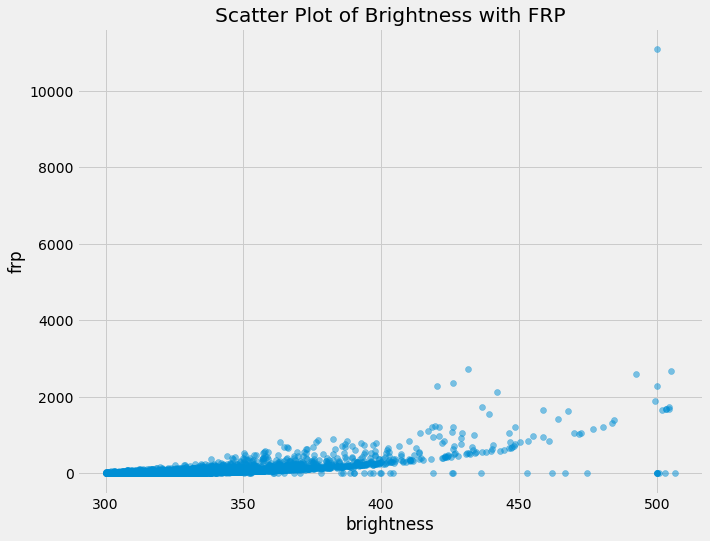

In [160]:
plt.scatter(df['brightness'], df['frp'], alpha = 0.5)
plt.title('Scatter Plot of Brightness with FRP')
plt.xlabel('brightness')
plt.ylabel('frp')

Text(0, 0.5, 'frp')

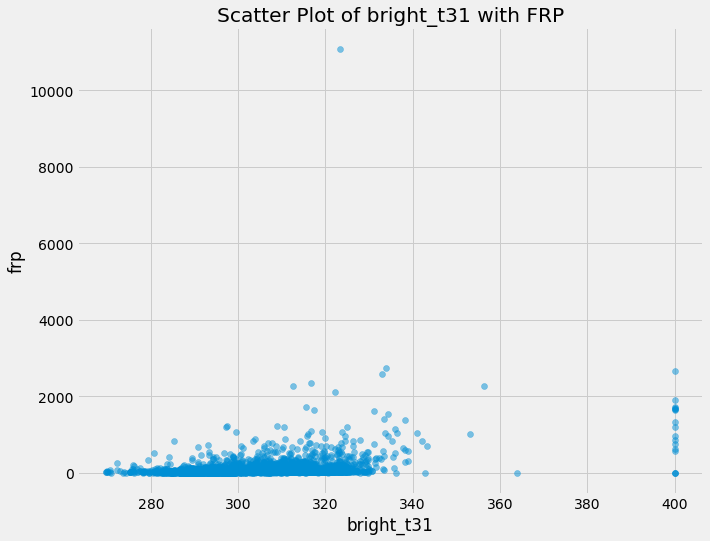

In [161]:
plt.scatter(df['bright_t31'], df['frp'], alpha = 0.5)
plt.title('Scatter Plot of bright_t31 with FRP')
plt.xlabel('bright_t31')
plt.ylabel('frp')

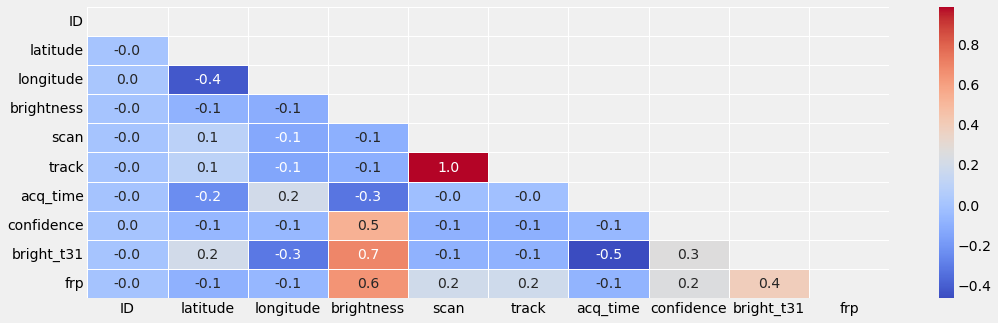

In [162]:
plt.figure(figsize = (16,5))
corr = train_data.corr()
matrix = np.triu(corr)
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.1f',linewidths=.5, mask=matrix)
plt.show()

In [163]:
# Check linearity between target and independent variables
def customized_scatterplot(y, x):
    style.use('fivethirtyeight')
    plt.subplots(figsize = (10,6))
    ## Plotting target variable with predictor variable(OverallQual)
    sns.regplot(y = y, x = x,line_kws={"color": 'darkgreen'})

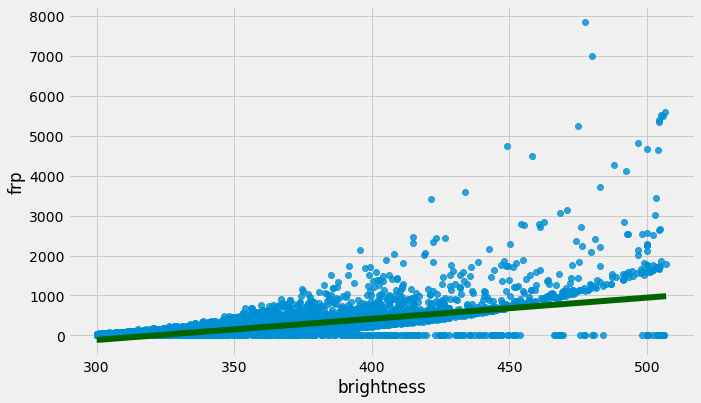

In [164]:
customized_scatterplot(train_data.frp,train_data.brightness)

In [165]:
# transforming target variable using np.log
train_data['frp'] = np.log1p(train_data['frp'])

In [166]:
# Dropping unneeded features
train_data = train_data.drop(columns=['ID','version','instrument','track','acq_time', 'bright_t31'],axis=1)

In [167]:
train_data.head()

latitude  longitude  brightness  scan    acq_date satellite  confidence  \
0   -25.117    149.245       363.1   1.2  2019-12-08     Terra         100   
1   -32.263    123.294       349.3   3.4  2020-01-03      Aqua          95   
2   -36.918    146.782       336.7   1.0  2020-01-02      Aqua         100   
3   -16.985    138.283       343.4   1.2  2019-12-12     Terra          85   
4   -14.865    131.262       311.5   1.5  2019-11-17     Terra          78   

        frp daynight  
0  4.640537        D  
1  5.664348        D  
2  3.678829        N  
3  3.437208        D  
4  2.533697        N

In [168]:
# Adding new features from the date column
train_data = train_data.drop(columns=['acq_date', 'satellite'], axis=1)

In [169]:
train_data.head()

latitude  longitude  brightness  scan  confidence       frp daynight
0   -25.117    149.245       363.1   1.2         100  4.640537        D
1   -32.263    123.294       349.3   3.4          95  5.664348        D
2   -36.918    146.782       336.7   1.0         100  3.678829        N
3   -16.985    138.283       343.4   1.2          85  3.437208        D
4   -14.865    131.262       311.5   1.5          78  2.533697        N

#### Data Preprocessing

In [170]:
train_data['daynight'] = pd.get_dummies(train_data['daynight'], drop_first=True)

In [171]:
y = train_data['frp']
x = train_data.drop(columns='frp', axis=1)

### Splitting data into train and test model

In [172]:
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state = 0)

In [173]:
df = df.drop(columns=['version','instrument','track','acq_time','acq_date', 'satellite','bright_t31'],axis=1)

In [174]:
df.head()

ID  latitude  longitude  brightness  scan  confidence    frp daynight
0  26000   -35.441    150.028       361.8   1.4         100  151.8        N
1  26001   -36.120    149.515       337.7   1.4          83   42.0        D
2  26002   -32.416    120.183       339.6   1.1          62   30.9        D
3  26003   -16.548    126.861       310.6   1.1          70    6.0        N
4  26004   -30.617    151.032       314.1   1.0          88   12.9        N

In [175]:
df['daynight'] = pd.get_dummies(df['daynight'], drop_first=True)

In [176]:
df.head()

ID  latitude  longitude  brightness  scan  confidence    frp  daynight
0  26000   -35.441    150.028       361.8   1.4         100  151.8         1
1  26001   -36.120    149.515       337.7   1.4          83   42.0         0
2  26002   -32.416    120.183       339.6   1.1          62   30.9         0
3  26003   -16.548    126.861       310.6   1.1          70    6.0         1
4  26004   -30.617    151.032       314.1   1.0          88   12.9         1

In [177]:
y_dev = df['frp']
x_dev = df.drop(columns='frp', axis=1)

In [178]:
test_data = test_data.drop(columns=['ID','version','instrument','track','acq_time', 'acq_date', 'satellite','bright_t31'],axis=1)

test_data['daynight'] = pd.get_dummies(test_data['daynight'], drop_first=True)

In [179]:
# Scalling the data
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

# We need to fit and transform the training set
x_train = sc_X.fit_transform(x_train)

# We need to fit the test set
x_test = sc_X.transform(x_test)

# We need to transform the dev data set
x_dev = sc_X.transform(x_dev)

# Transforming the test data 
test_data = sc_X.transform(test_data)

ValueError: X has 7 features, but StandardScaler is expecting 6 features as input.

In [180]:
type(X_train)

numpy.ndarray

In [181]:
# Call in the LinearRegression object
lin_reg = LinearRegression(normalize=True, n_jobs=-1)

# fit train and test data. 
lin_reg.fit(X_train, y_train)

# Predict test data. 
y_pred = lin_reg.predict(X_test)

In [182]:
# Checking the coefficients and intercepts of the model
print('the coefficents of the model are', lin_reg.coef_)
print('the intercept of the model is', lin_reg.intercept_)

the coefficents of the model are [-0.05284161  0.01935961  0.65715343  0.55594415  0.24737384 -0.09920321]
the intercept of the model is 3.726307419866452


In [184]:
# Checking the r squared mean of the model
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=y_pred)))
print('mean squared error is', mean_squared_error(y_test, y_pred)) 

R squared: 0.648858312495455
mean squared error is 0.4987696141838492


### Cross validations for the model

In [186]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold

cv = KFold(shuffle=True, random_state=0, n_splits=10)
scores = cross_val_score(lin_reg, x_dev,y_dev,cv = cv, scoring = 'r2') ##mean_absolute_error')

In [187]:
print("Cross-validation scores: {}".format(scores))
print()
print("Cross-validation scores on the average is : {}".format(scores.mean()))

Cross-validation scores: [0.6259722  0.61901924 0.60469416 0.75722073 0.58428346 0.22819092
 0.28892955 0.68977    0.57729011 0.29809846]

Cross-validation scores on the average is : 0.5273468825961541


### Predicting the y values of the test

In [188]:
y_predict = lin_reg.predict(test_data)
print(y_predict)

[262.17249965 298.10580972 242.33057108 ... 246.18877688 219.45801303
 265.59209036]


In [189]:
y_predict = pd.DataFrame(y_predict)
y_predict

0
0      262.172500
1      298.105810
2      242.330571
3      236.622505
4      278.406883
...           ...
14996  256.597961
14997  255.515369
14998  246.188777
14999  219.458013
15000  265.592090

[15001 rows x 1 columns]

### Checking for perfect multicollinearity

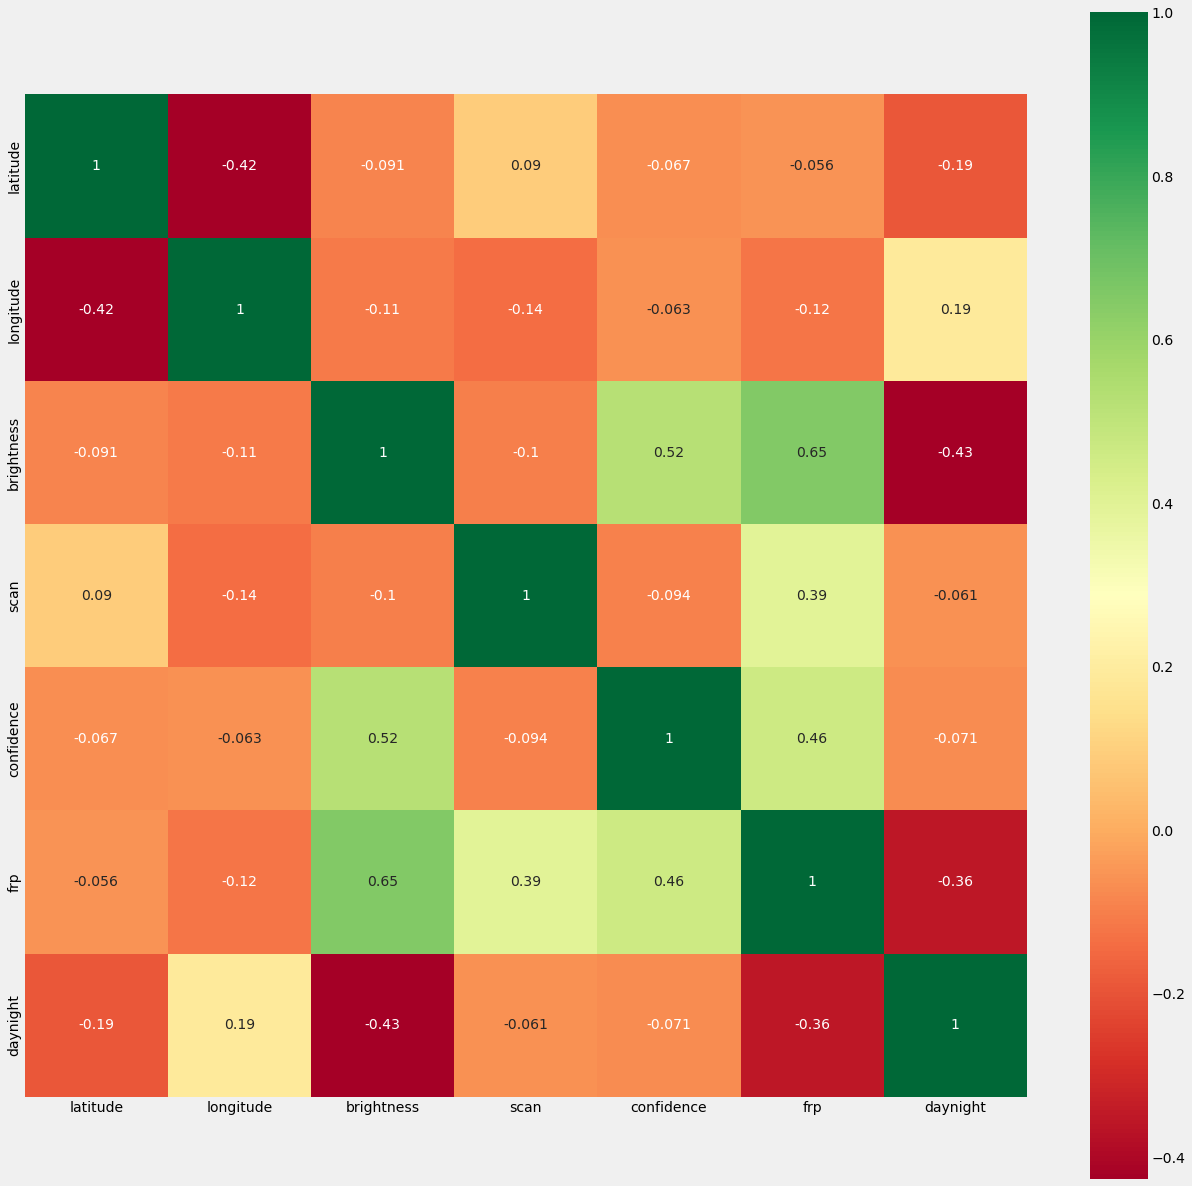

In [190]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(train_data.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

### Heatmap observations:

### Track and scan appear to be perfectly correlated. 
### Bright_t31 and brightness are highly correlated

#### SInce most of the assumptions were met we can say that our linear regression model is good